<a id='top'></a>

# Introduction & Approach Taken
This kernel represents my first personal exploration of an (almost) end-to-end data science process. While starting off as a kernel to complete the Kaggle Learn Machine Learning exercise, it has now been significantly modified to serve a broader learning experience for myself. If you find any errors, lapses in logic, or just have advice for me, please do post them. Any feedback would certainly be appreciated. <br>

The challenge is based on the Kaggle Housing Prices Competition that provides a dataset with different house attributes together with the price label. The aim is to develop a model capable of predicting the house price based on the data available.

Different data scientists espouse various approaches for the process of applied data science. The following is an adaptation of some that I have come across, which shall form the structure of this kernel and my approach taken for this particular competition:

[1. Exploratory Data Analysis](#explore) <br>
> [1.1 Preliminary observations](#prelim_explore) <br>
   [1.2 Exploring numerical attributes](#explore_num_columns) <br>
   [1.3 Exploring categorical attributes](#explore_cat_columns)  <br>

[2. Data Cleaning & Preprocessing](#data_clean)
> [2.1 Dealing with missing/null values](#fix_nans) <br>
   [2.2 Addressing outliers](#address_outliers)<br>
   [2.3 Transforming data to reduce skew](#transform_skew) <br>

[3. Feature Selection & Engineering](#feature_eng)

[4. Preliminary Assessment of Machine Learning Algorithms](#algorithms)

[5. Selection of Best Algorithm(s) and Fine-Tuning](#fine_tune)


### Import modules

In [1]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading in input file

In [2]:
# Path of the file to read.
file_path = '../input/train.csv'

# Load data into a pandas DataFrame. Note: 1st column is ID
home_data = pd.read_csv(file_path, index_col=0)

<a id='explore'></a>

# 1. Exploratory Data Analysis
Amongst others, the data is explored to:
1. Gain a preliminary understanding of available data
2. Check for missing or null values
3. Find potential outliers
4. Assess correlations amongst attributes/features
5. Check for data skew

[Back to contents](#top)

<a id='prelim_explore'></a>

## 1.1 Preliminary observations
Examples from the dataset are shown below. <br><br>
[Back to contents](#top)

In [3]:
home_data.tail()
# home_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
home_data.shape

(1460, 80)

The "shape" of the dataset shows that it has 1460 rows/instances, with data from 80 attributes. <br>
Out of the 80 attributes, one is the target (SalePrice) that the model should predict. <br>
Hence, there are 79 attributes that may be used for feature selection/engineering.

### Numerical columns within the dataset

In [5]:
# List of numerical attributes
home_data.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
len(home_data.select_dtypes(exclude='object').columns)

37

The above shows that there appears to be 37 numerical columns, including the target, SalePrice. <br>
Notes: <br>
* Some potential anomalies in certain rows of the dataset may cause the column data type to become an 'object'. This may lead to an error in distinguishing between numerical and categorical columns. How can this be checked efficiently?
* It is possible that there are numerical columns that have data in the form of discrete, and limited number of values. Such columns may also be interpreted as categorical data.
<br>

The 37 numerical columns have the following general characteristics:

In [7]:
home_data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


### Categorical columns within the dataset

In [8]:
home_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
len(home_data.select_dtypes(include='object').columns)

43

There are 43 categorical columns, with the following characteristics:

In [10]:
home_data.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


<a id='explore_num_columns'></a>

## 1.2 Exploring numerical columns
[Back to contents](#top)

### Skew of target column
It appears to be good practice to minimise the skew of the dataset. The reason often given is that skewed data adversely affects the prediction accuracy of regression models. <br>
Note: While important for linear regression, correcting skew is not necessary for Decisions Trees and Random Forests.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


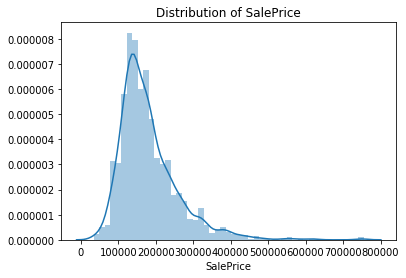

In [11]:
target = home_data.SalePrice
plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


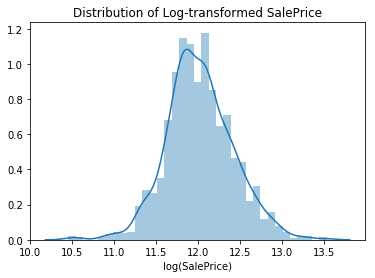

In [12]:
sns.distplot(np.log(target))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [13]:
print('SalePrice has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed SalePrice improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

SalePrice has a skew of 1.88 while the log-transformed SalePrice improves the skew to 0.12


__Notes for Data Cleaning & Preprocessing:__
* Perform log transformation on SalePrice
* Feature variables that are skewed should also be investigated to assess whether they require transformation

### Distributions of attributes

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


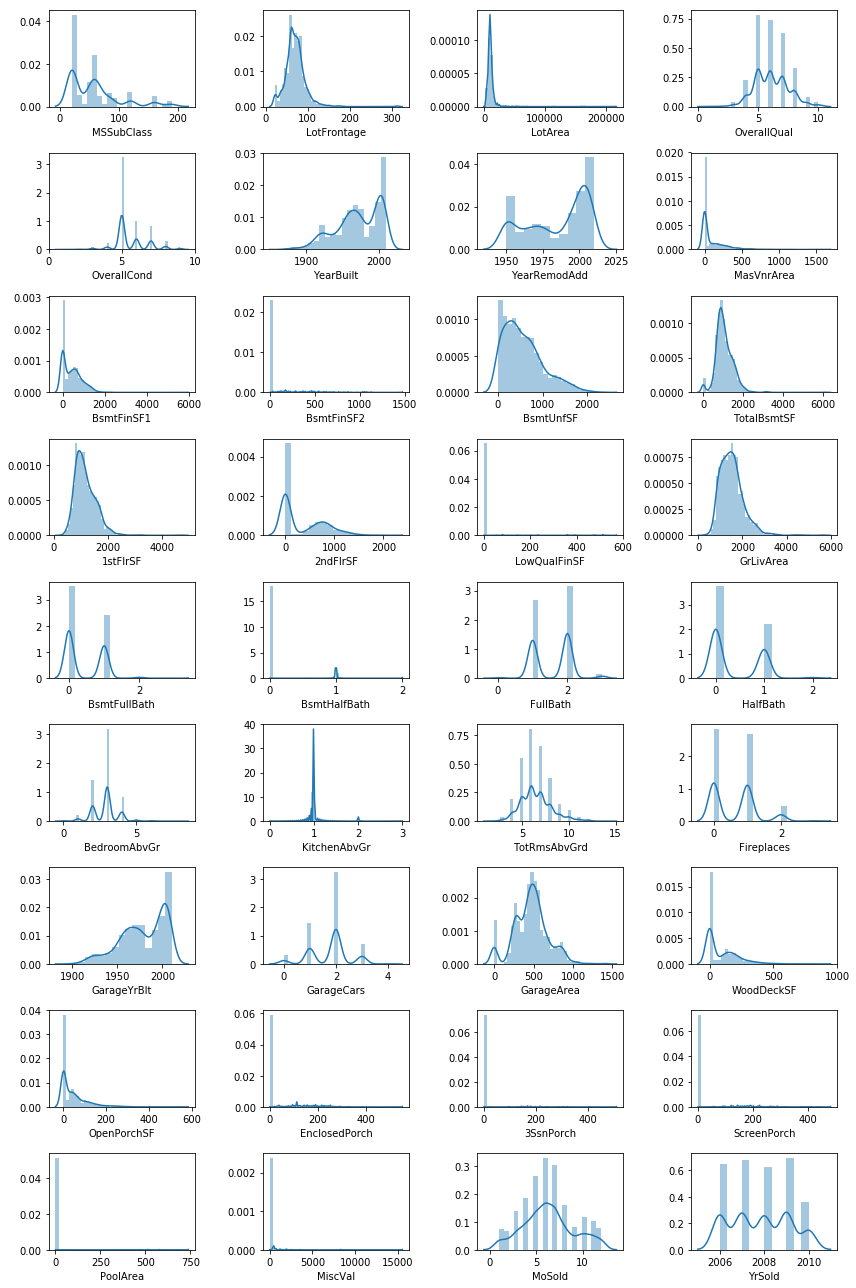

In [14]:
num_attributes = home_data.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

__Notes for Data Cleaning & Preprocessing:__ <br>
Uni-modal, skewed distributions could potentially be log transformed: <br>
> LotFrontage, LotArea, 1stFlrSF, GrLivArea, OpenPorchSF<br>

After-note: This will be a future addition.

### Finding Outliers
Visualisation of data may support the discovery of possible outliers within the data. Examples of how this can be done include:
1. Within univariate analysis, for example through using box plots. Outliers are observations more than a multiple (1.5-3) of the IQR (inter-quartile range) beyond the upper or lower quartile. (If data is skewed, it may be helpful to transform them first to a more symmetric distribution shape)
2. Within bivariate analysis, for example scatterplots. Outliers have y-values that are unusual in relation to other observations with similar x-values. Alternatively, plots of the residuals from fitted least square line of bivariate regression can also indicate outliers.

The consensus is that all outliers should be carefully examined:
* Go back to original data to check for recording or transcription errors
* If no such errors, look carefully for unusual features of the individual unit to explain difference. This may lead to new theory/discoveries 
* If data cannot be checked further, outlier is usually (often) dropped from the dataset.

The scatterplots of SalePrice against each numerical attribute is shown below, with the aim of employing method 2 above with bivariate analysis.

[Back to contents](#top)

__Univariate analysis - box plots for numerical attributes__

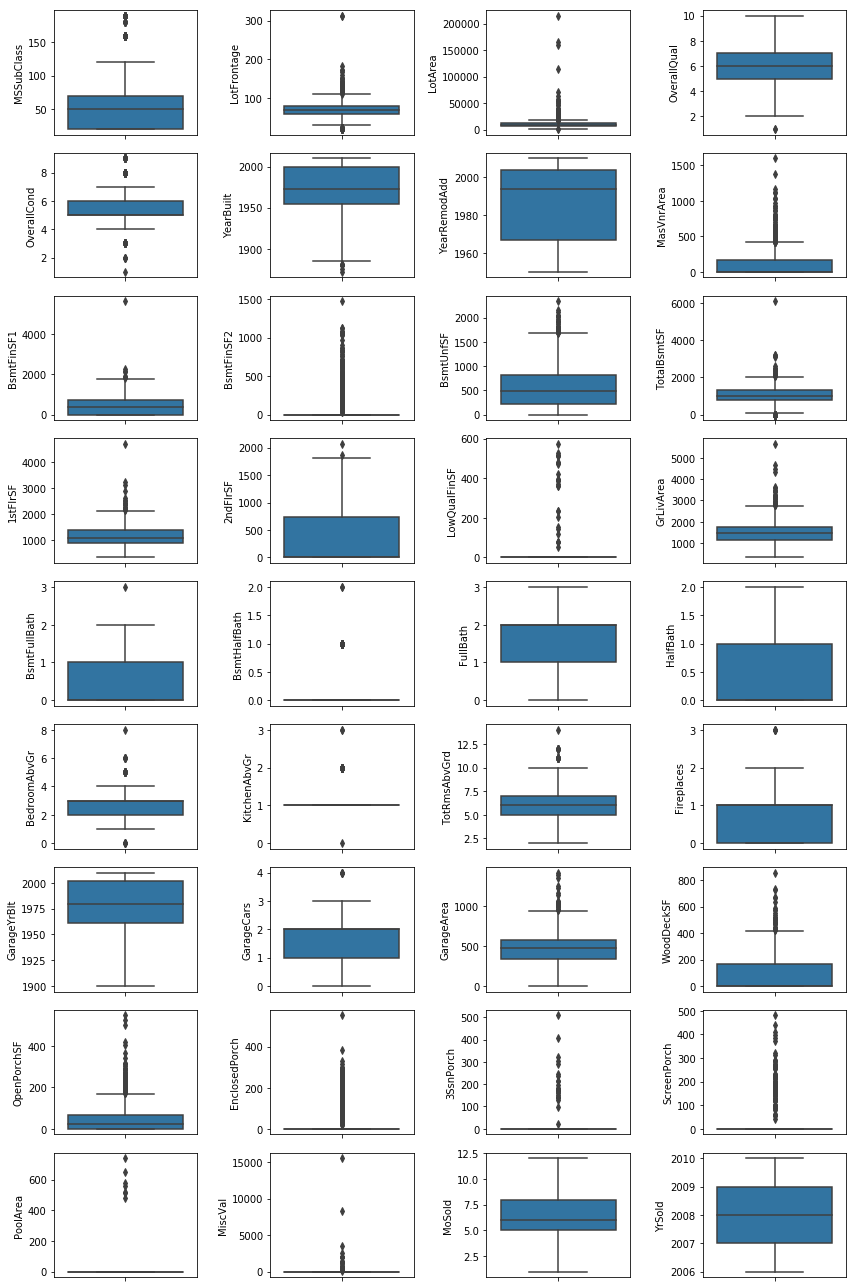

In [15]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

__Bivariate analysis - scatter plots for target versus numerical attributes__

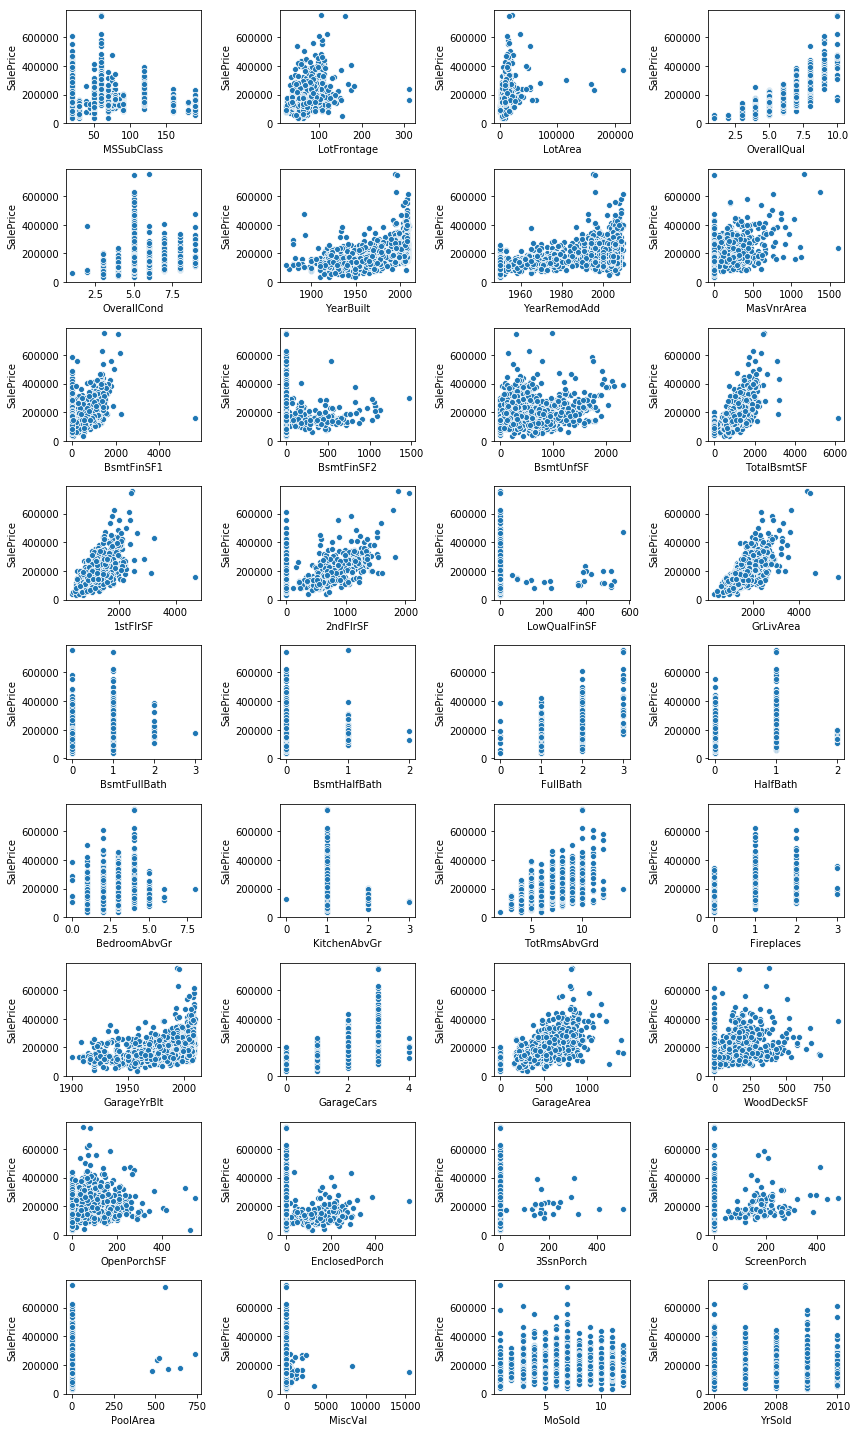

In [16]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], target)
    
plt.tight_layout()
plt.show()

<a id='notes_outliers'></a>

__Notes for Data Cleaning & Preprocessing__ <br>
Based on a first viewing of the scatter plots against SalePrice, there appears to be:
* A few outliers on the LotFrontage (say, >200) and LotArea (>100000) data.
* BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
* 1stFlrSF (>4000)
* GrLivArea (>4000 AND SalePrice <300000)
* LowQualFinSF (>550) <br>

Reference: [quick link to the implementation](#address_outliers) <br>

### Assess correlations amongst attributes
The linear correlation between two columns of data is shown below. There are various correlation calculation methods, but the Pearson correlation is often used and is the default method. It may be useful to note that:
1. A combination of the correlation figure and a scatter plot can support the understanding of whether there is a non-linear correlation (i.e. depending on the data, this may result in a low value of linear correlation, but the variables may still be strongly correlated in a non-linear fashion)
2. Correlation values may be heavily influenced by single outliers! 
<br><br>

Several authors have suggested that _"to use linear regression for modelling, it is necessary to remove correlated variables to improve your model"_, and _"it's a good practice to remove correlated variables during feature selection"_<br><br>

Below is a heatmap of the correlation of the numerical columns:

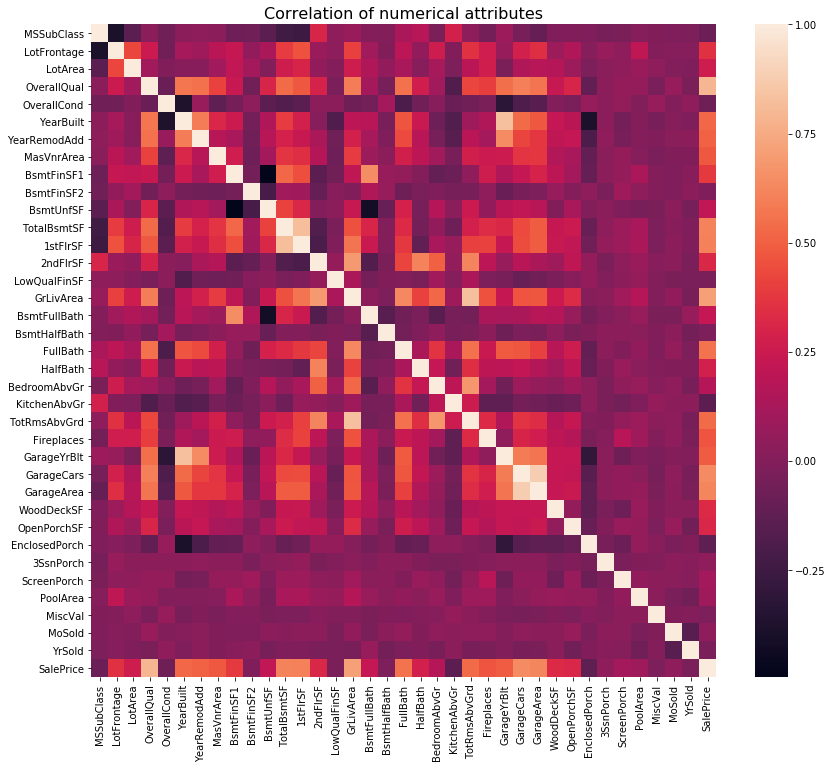

In [17]:
correlation = home_data.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

## Heatmap with annotation of correlation values
# sns.heatmap(home_data.corr(), annot=True)

With reference to the target SalePrice, the top correlated attributes are:

In [18]:
correlation['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Show scatter plots for each numerical attribute (again, but different, less-efficient code) and show correlation value:

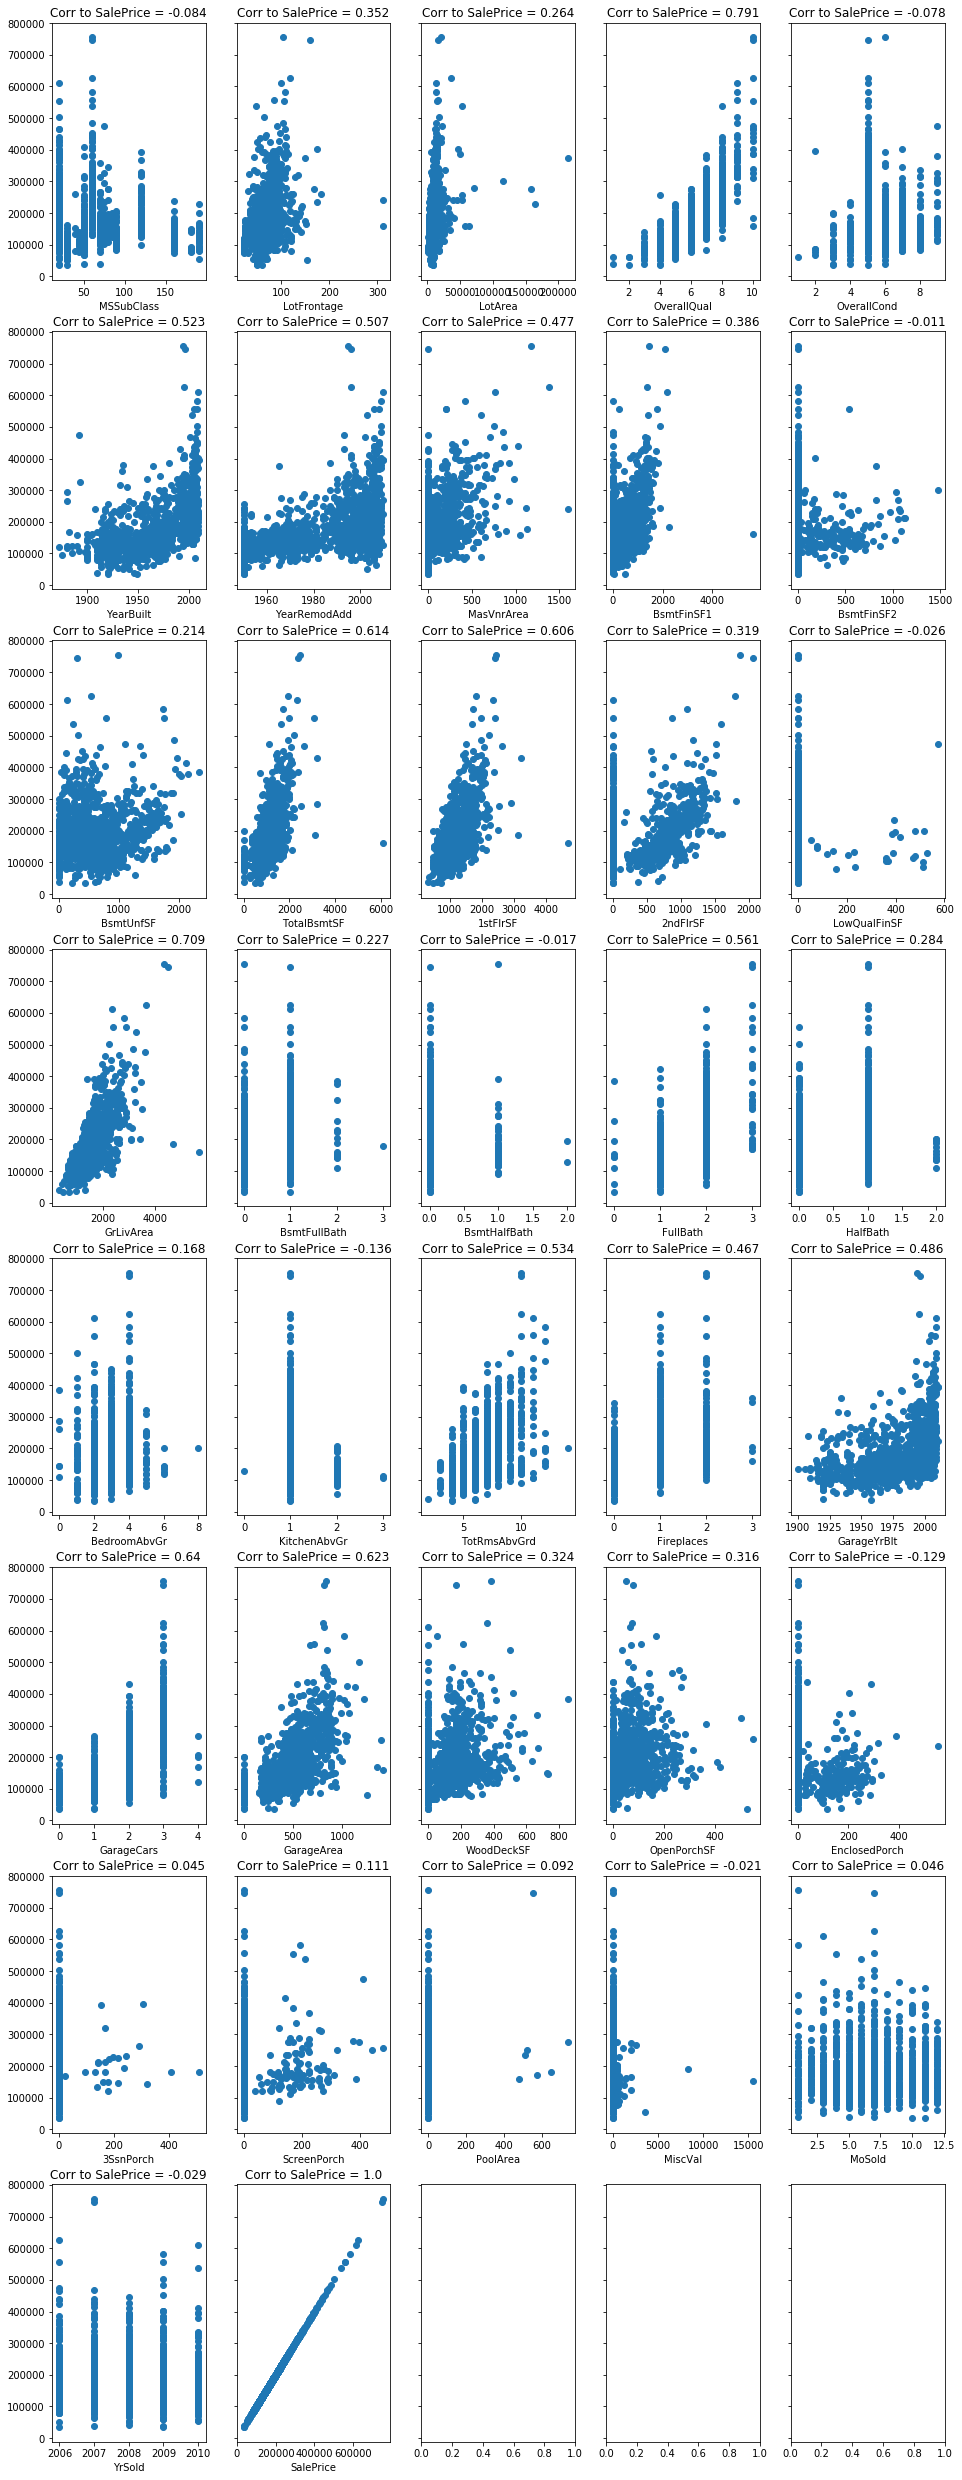

In [19]:
num_columns = home_data.select_dtypes(exclude='object').columns
corr_to_price = correlation['SalePrice']
n_cols = 5
n_rows = 8
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(num_columns):
            plt.scatter(home_data[num_columns[index]], home_data.SalePrice)
            plt.xlabel(num_columns[index])
            plt.title('Corr to SalePrice = '+ str(np.around(corr_to_price[index], decimals=3)))
plt.show()

__Notes for Feature Selection & Engineering:__
Based on the scatter plots and correlation figures above, consider:
* Excluding GarageArea - highly (0.88) correlated with GarageCars, which has a higher corr with Price
* Excluding GarageYrBlt - highly (0.83) correlated with YearBuilt
* Excluding all attributes with low corr with Price and unclear non-linear correlation - e.g. MSSubClass, MoSold, YrSold, MiscVal, BsmtFinSF2, BsmtUnfSF, LowQualFinSF?

<a id='check_null'></a>

### Missing/null values in numerical columns

[Back to contents](#top)

In [20]:
# Show columns with most null values:
num_attributes.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

__Notes for Data Cleaning & Processing:__
* Not yet clear what to do with LotFrontage missing values. Simple imputation with median? LotFrontage correlation with Neigborhood?
* GarageYrBlt is highly correlated with YearBuilt, and as an after-note, it is discarded before the machine learning step. Hence no action required.
* MasVnrArea has 8 missing values, the same number as missing MasVnrType values. Likely not to have masonry veneer. Hence, fill with 0 

<a id='explore_cat_columns'></a>

## 1.3 Exploring categorical columns
[Back to contents](#top)
### Examples of box plots of SalePrice versus categorical values

In [21]:
cat_columns = home_data.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


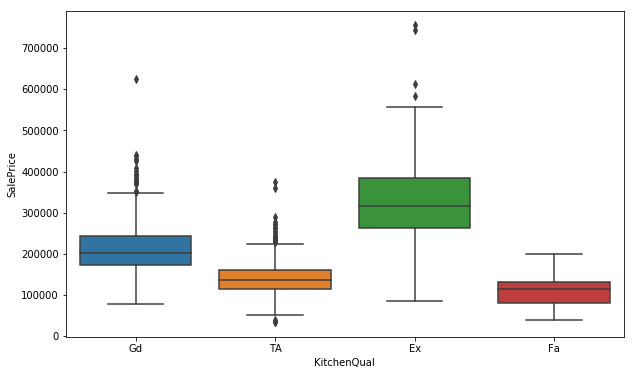

In [22]:
var = home_data['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=home_data.SalePrice, x=var)
plt.show()

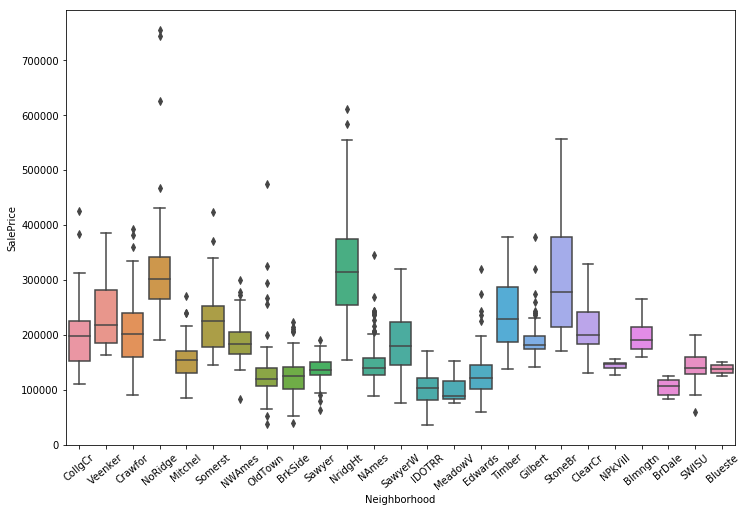

In [23]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=home_data.SalePrice, x=home_data.Neighborhood)
plt.xticks(rotation=40)
plt.show()

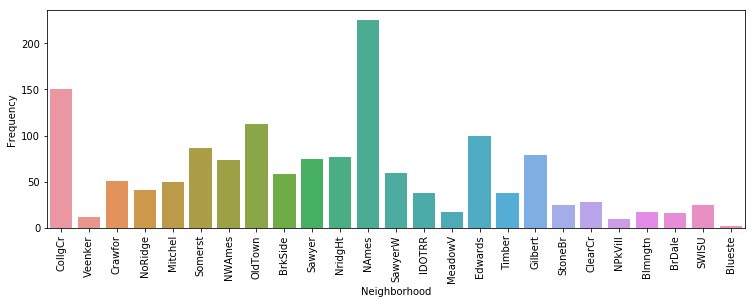

In [24]:
## Count of categories within Neighborhood attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=home_data)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

### Missing/null values in categorical columns

[Back to contents](#top)

In [25]:
home_data[cat_columns].isna().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
dtype: int64

__Notes for Data Cleaning & Preprocessing:__
* For the moment, assume that PoolQC to Bsmt attributes are missing as the houses do not have them (pools, basements, etc.). Hence, the missing values could be filled in with "None".
* MasVnrType has 8 missing values, the same number as missing MasVnrArea values. Likely not to have masonry veneer. Hence, fill with 'None' 

<a id='data_clean'></a>

# 2. Data Cleaning & Preprocessing

[Back to contents](#top)<br><br>

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

<a id='fix_nans'></a>

## 2.1 Dealing with missing/null values
[Back to contents](#top)

In [27]:
# Create copy of dataset  ====================================
home_data_copy = home_data.copy()

# Dealing with missing/null values ===========================
# Numerical columns:
home_data_copy.MasVnrArea = home_data_copy.MasVnrArea.fillna(0)
# HOW TO TREAT LotFrontage - 259 missing values??

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in cat_cols_fill_none:
    home_data_copy[cat] = home_data_copy[cat].fillna("None")
    

In [28]:
# Check for outstanding missing/null values
# Scikit-learn's Imputer will be used to address these
home_data_copy.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
Electrical       1
SalePrice        0
Foundation       0
dtype: int64

<a id='address_outliers' ></a>

## 2.2 Addressing outliers
[Back to contents](#top)<br>
Reference: [Quick link to notes](#notes_outliers)

In [29]:
# Remove outliers based on observations on scatter plots against SalePrice:
home_data_copy = home_data_copy.drop(home_data_copy['LotFrontage']
                                     [home_data_copy['LotFrontage']>200].index)
home_data_copy = home_data_copy.drop(home_data_copy['LotArea']
                                     [home_data_copy['LotArea']>100000].index)
home_data_copy = home_data_copy.drop(home_data_copy['BsmtFinSF1']
                                     [home_data_copy['BsmtFinSF1']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy['TotalBsmtSF']
                                     [home_data_copy['TotalBsmtSF']>6000].index)
home_data_copy = home_data_copy.drop(home_data_copy['1stFlrSF']
                                     [home_data_copy['1stFlrSF']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy.GrLivArea
                                     [(home_data_copy['GrLivArea']>4000) & 
                                      (target<300000)].index)
home_data_copy = home_data_copy.drop(home_data_copy.LowQualFinSF
                                     [home_data_copy['LowQualFinSF']>550].index)


<a id='transform_skew'></a>

## 2.3 Transforming data to reduce skew
For the moment, this is restricted to the target variable.
[Back to contents](#top)

In [30]:
home_data_copy['SalePrice'] = np.log(home_data_copy['SalePrice'])
home_data_copy = home_data_copy.rename(columns={'SalePrice': 'SalePrice_log'})

<a id='feature_eng'></a>

# 3. Feature Selection & Engineering

[Back to contents](#top)

### Considering highly-correlated features
Feeding highly-correlated features to machine algorithms may cause a reduction in performance. Hence, these are addressed below:

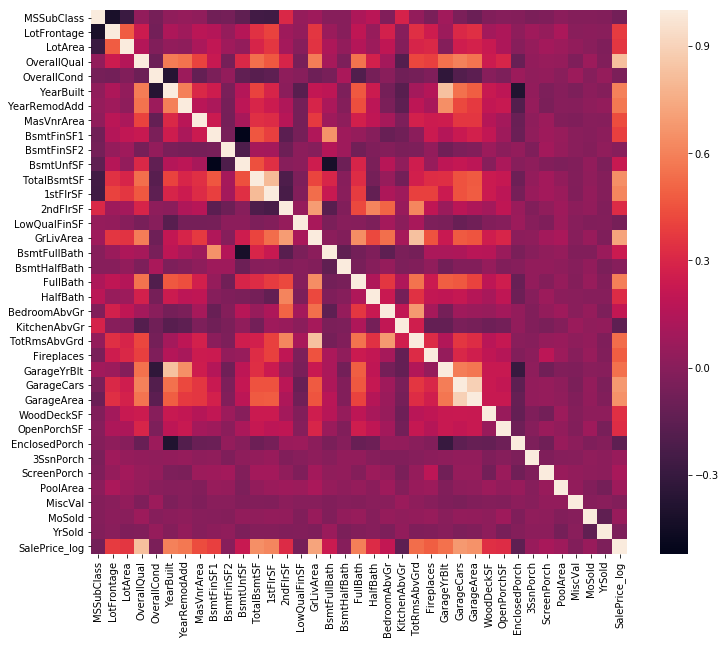

In [31]:
transformed_corr = home_data_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)

Highly-correlated attributes include (left attribute has higher correlation with SalePrice_log):
* GarageCars and GarageArea (0.882)
* YearBuilt and GarageYrBlt (0.826)
* GrLivArea_log1p and TotRmsAbvGrd (0.826)
* TotalBsmtSF and 1stFlrSF_log1p (0.780)

Perhaps choose to drop the column with the lower correlation against SalePrice_log from the above pairs with more than 0.8 correlation.

### Perform feature selection, and encoding of categorical columns

In [32]:
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'] # high corr with other attributes

X = home_data_copy.drop(attributes_drop, axis=1)

# Create target object and call it y
y = home_data_copy.SalePrice_log

# One-hot-encoding to transform all categorical data
X = pd.get_dummies(X)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Normalisation - to be added later
# normaliser = StandardScaler()
# train_X = normaliser.fit_transform(train_X)
# val_X = normaliser.transform(val_X)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

<a id='algorithms'></a>

# 4. Preliminary Assessment of Machine Learning Algorithms
[Back to contents](#top)

### Import machine learning modules

In [33]:
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

__Reminder: target is now log(SalePrice). After prediction call, need to inverse-transform to obtain SalePrice!__

In [34]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

# Specify Model ================================
# iowa_model = DecisionTreeRegressor(random_state=1)
# # Fit Model
# iowa_model.fit(train_X, train_y)

# # Make validation predictions and calculate mean absolute error
# val_predictions = iowa_model.predict(val_X)
# val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
# mae_compare['DecisionTree'] = val_mae
# # print("Validation MAE for Decision Tree when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Decision Tree. Using best value for max_leaf_nodes ==============
# iowa_model = DecisionTreeRegressor(max_leaf_nodes=90, random_state=1)
# iowa_model.fit(train_X, train_y)
# val_predictions = iowa_model.predict(val_X)
# val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
# mae_compare['DecisionTree_opt_max_leaf_nodes'] = val_mae
# # print("Validation MAE for Decision Tree with best value of max_leaf_nodes: {:,.0f}".format(val_mae))

# Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))

mae_compare['RandomForest'] = rf_val_mae
# print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))


# XGBoost. Define the model. ======================================
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
              eval_set=[(val_X,val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(val_y))

mae_compare['XGBoost'] = xgb_val_mae
# print("Validation MAE for XGBoost Model: {:,.0f}".format(xgb_val_mae))

# Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))

mae_compare['LinearRegression'] = linear_val_mae
# print("Validation MAE for Linear Regression Model: {:,.0f}".format(linear_val_mae))

# Lasso ==============================================================
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))

mae_compare['Lasso'] = lasso_val_mae
# print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))

# Ridge ===============================================================
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(val_y))

mae_compare['Ridge'] = ridge_val_mae
# print("Validation MAE for Ridge Regression Model: {:,.0f}".format(ridge_val_mae))

# ElasticNet ===========================================================
elastic_net_model = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(val_X)
elastic_net_val_mae = mean_absolute_error(inv_y(elastic_net_val_predictions), inv_y(val_y))

mae_compare['ElasticNet'] = elastic_net_val_mae
# print("Validation MAE for Elastic Net Model: {:,.0f}".format(elastic_net_val_mae))

# KNN Regression ========================================================
# knn_model = KNeighborsRegressor()
# knn_model.fit(train_X, train_y)
# knn_val_predictions = knn_model.predict(val_X)
# knn_val_mae = mean_absolute_error(inv_y(knn_val_predictions), inv_y(val_y))

# mae_compare['KNN'] = knn_val_mae
# # print("Validation MAE for KNN Model: {:,.0f}".format(knn_val_mae))

# Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))

mae_compare['GradientBoosting'] = gbr_val_mae
# print("Validation MAE for Gradient Boosting Model: {:,.0f}".format(gbr_val_mae))

# # Ada Boost Regression ================================================
# ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=5)
# ada_model.fit(train_X, train_y)
# ada_val_predictions = ada_model.predict(val_X)
# ada_val_mae = mean_absolute_error(inv_y(ada_val_predictions), inv_y(val_y))

# mae_compare['AdaBoost'] = ada_val_mae
# # print("Validation MAE for Ada Boost Model: {:,.0f}".format(ada_val_mae))

# # Support Vector Regression ===========================================
# svr_model = SVR(kernel='linear')
# svr_model.fit(train_X, train_y)
# svr_val_predictions = svr_model.predict(val_X)
# svr_val_mae = mean_absolute_error(inv_y(svr_val_predictions), inv_y(val_y))

# mae_compare['SVR'] = svr_val_mae
# print("Validation MAE for SVR Model: {:,.0f}".format(svr_val_mae))

print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE values for different algorithms:


Algorithm
Lasso               13687.0
Ridge               14272.0
LinearRegression    14419.0
XGBoost             14673.0
GradientBoosting    14716.0
ElasticNet          16743.0
RandomForest        17134.0
dtype: float64

### Cross-validation
Use scikit-learn's cross_val_score to try K-fold cross-validation. 

In [35]:
from sklearn.model_selection import cross_val_score

imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)
n_folds = 10

# =========================================================================
scores = cross_val_score(lasso_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.109
Error std deviation = 0.016


In [36]:
scores = cross_val_score(gbr_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
gbr_mae_scores = np.sqrt(-scores)

print('For Gradient Boosting model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(gbr_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(gbr_mae_scores.std().round(decimals=3)))

For Gradient Boosting model:
Mean RMSE = 0.119
Error std deviation = 0.018


In [37]:
scores = cross_val_score(xgb_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For XGBoost model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For XGBoost model:
Mean RMSE = 0.116
Error std deviation = 0.02


In [38]:
scores = cross_val_score(rf_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For Random Forest model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For Random Forest model:
Mean RMSE = 0.142
Error std deviation = 0.018


<a id='fine_tune'><a>

# 5. Selection of Best Algorithm(s) & Fine-Tuning
### Create a Model and Make Predictions for the Competition
Read the file of "test" data. And apply best model to make predictions

__Reminders:__
* __Need to perform all transformations and normalisation, etc. to test data similar to when training the data__
* __Make sure to inverse transform predictions to get predicted SalePrice__

[Back to contents](#top)

### Use scikit-learn's function to grid search for the best combination of hyperparameters

In [39]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# # Tuning XGBoost
# param_grid = [{'n_estimators': [1000, 1500], 
#                'learning_rate': [0.01, 0.03] }]
# #               'max_depth': [3, 6, 9]}]

# top_reg = XGBRegressor()

# Tuning Lasso
param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
top_reg = Lasso()

# -------------------------------------------------------
grid_search = GridSearchCV(top_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(imputed_X, y)

grid_search.best_params_

{'alpha': 0.0005}

In [40]:
# path to file you will use for predictions
test_data_path = '../input/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

### Repeat pre-processing defined previously

In [41]:
# create test_X which to perform all previous pre-processing on
test_X = test_data.copy()

# Repeat treatments for missing/null values =====================================
# Numerical columns:
test_X.MasVnrArea = test_X.MasVnrArea.fillna(0)

# Categorical columns:
for cat in cat_cols_fill_none:
    test_X[cat] = test_X[cat].fillna("None")

# Repeat dropping of chosen attributes ==========================================
if 'SalePrice_log' in attributes_drop:
    attributes_drop.remove('SalePrice_log')

test_X = test_data.drop(attributes_drop, axis=1)

# One-hot encoding for categorical data =========================================
test_X = pd.get_dummies(test_X)


# ===============================================================================
# Ensure test data is encoded in the same manner as training data with align command
final_train, final_test = X.align(test_X, join='left', axis=1)

# Imputer for all other missing values in test data. Note: Do not 'fit_transform'
final_test_imputed = my_imputer.transform(final_test)


### Create final model

In [42]:
# Create model - on full set of data (training & validation)
# Best model = Lasso?
final_model = Lasso(alpha=0.0005, random_state=5)
# final_model = XGBRegressor(n_estimators=1500, learning_rate=0.03)
final_train_imputed = my_imputer.fit_transform(final_train)

# Fit the model using all the data - train it on all of X and y
final_model.fit(final_train_imputed, y)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=5,
   selection='cyclic', tol=0.0001, warm_start=False)

### Make predictions for submission

In [43]:
# make predictions which we will submit. 
test_preds = final_model.predict(final_test_imputed)

# The lines below shows you how to save your data in the format needed to score it in the competition
# Reminder: predictions are in log(SalePrice). Need to inverse-transform.
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': inv_y(test_preds)})

output.to_csv('submission.csv', index=False)

In [45]:
!pip list|grep seaborn

seaborn                            0.9.0              


# Future Study
### Exploratory Data Analysis
* How to assess outliers for categorical columns?
* How to check for correlation amongst categorical columns?

### Data Cleaning & Preprocessing
* Add code to perform data normalisation/standardisation.
* Create custom scikit-learn preprocessing class so that this can be easily used later with pipelines.
* Consider scikit-learn's PowerTransformer preprocessing module to fit and transform columns to be more Gaussian-like. 

### Feature Selection & Engineering
* Think about possible combination of attributes to create useful new features, including polynomials.
* Explore pros and cons of other methods to encode categorical attributes, besides one-hot encoding
* Consider further advanced preprocessing techniques, such as Principal Components Analysis for dimensionality reduction, to create new features

### Preliminary Assessment of ML Algorithms
* Use scikit-learn's pipelines!
* Learn how best to utilise ensemble methods.
* Explore choices for performance criteria.
* Plots to diagnose bias vs. variance, and learning curves

### Selection of Best Algorithm(s) & Fine-tuning
* Test newly engineered features as hyperparameters in grid-search cross-validation.
* Partial-dependence plots for understanding the final model better.

[Back to contents](#top)


